# Import Data & Preparation

In [1]:
# Load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.sparse import hstack

In [2]:
pd.set_option('max_columns', 50)
pd.set_option('max_row', 100)
pd.set_option('max_colwidth', 300)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load the data
train=pd.read_csv('product_train.csv')
test=pd.read_csv('product_test.csv')
dictionary=pd.read_csv('dictionary.csv')

In [4]:
train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i wear a size 8 i ordered the m/l . it way really big and to wide",4,1,1,General Petite,Jackets,Jackets
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare of the ruffled back peplum and the elegance of the beaded front neckline. the beading is lovely and mine was intact. i bought my normal small based on reviews and the fit was perfect. (34-b) the beige color is a classic neutral and can be worn year ro...,5,1,3,General Petite,Tops,Knits
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like skin tight clothes. i bought this top a bit loose but it does not look like i am wearing a sack. it is tunic length on me so i have worn it with jeans and boots. i love the way it flows while i walk. very flattering on. would definitely recommend!,5,1,0,General,Tops,Knits
3,14369,829,45,NaN,"Really flattering cut, this shirt is perfect for fall. got so many compliments the first time i wore it!",5,1,0,General Petite,Tops,Blouses
4,505,833,56,NaN,Love the fabric & lace on this top. like other reviews said the arm area is tight where the lace meets the fabric which makes the fit uncomfortable. sadly this top is going back. if you have very skinny upper arms this top will fit fine.,4,1,0,General,Tops,Blouses


In [5]:
test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year...,3,14,General,Dresses,Dresses
1,11,1095,39,NaN,This dress is perfection! so pretty and flattering.,5,2,General Petite,Dresses,Dresses
2,13,767,44,Runs big,"Bought the black xs to go under the larkspur midi dress because they didn't bother lining the skirt portion (grrrrrrrrrrr).\r\r\nmy stats are 34a-28/29-36 and the xs fit very smoothly around the chest and was flowy around my lower half, so i would say it's running big.\r\r\nthe straps are very p...",5,0,Initmates,Intimate,Intimates
3,19,1077,47,Stylish and comfortable,"I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.",5,0,General,Dresses,Dresses
4,24,847,55,Versatile,"I love this shirt because when i first saw it, i wasn't sure if it was a shirt or dress. since it is see-through if you wear it like a dress you will need a slip or wear it with leggings. i bought a slip, wore the tie in the back, and rocked it with white wedges. you could also wear it as a vest...",5,0,General,Tops,Blouses


In [6]:
dictionary

,ID,Unique ID of the review
0,Product_ID,ID of the product
1,Age,Age of the consumer
2,Review_Title,Title of the review written by the consumer
3,Review_Text,Text of the review written by the consumer
4,Rating,Product rating by the consumer
5,Recommended,Whether the product is recommended or not by the consumer
6,Positive_Feedback_Count,Number of positive feedback on the review
7,Division,Name of the division the product is in
8,Department,Name of the department the product is in
9,Type,Type of the product


In [7]:
print(train.shape)
print(test.shape)

(16440, 11)
(6803, 10)


In [8]:
train.describe()

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,16440.000,16440.000,16440.000,16440.000,16440.000,16440.000
mean,11709.318,918.378,43.196,4.204,0.824,2.564
std,6769.069,203.942,12.273,1.106,0.381,5.911
min,0.000,0.000,18.000,1.000,0.000,0.000
25%,5865.750,861.000,34.000,4.000,1.000,0.000
50%,11703.500,936.000,41.000,5.000,1.000,1.000
75%,17540.500,1078.000,52.000,5.000,1.000,3.000
max,23485.000,1205.000,99.000,5.000,1.000,122.000


In [9]:
train = train.drop(columns = ['Product_ID', 'ID'])
test = test.drop(columns = ['Product_ID', 'ID'])

# EDA
Fill in missing information

In [10]:
train.isnull().sum()

Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64

In [11]:
test.isnull().sum()

Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     5
Department                   5
Type                         5
dtype: int64

In [12]:
def missingness(c = False):
    a = train.isnull().sum() 
    b = test.isnull().sum() 
    df1 = pd.concat([a,b], axis = 1).rename(columns = {0:'train', 1:'test'})
    df2 = df1[(df1['train'] != 0) | (df1['test'] != 0)]
              
    if c == False:
        return df1
    else:
        return df2

In [13]:
missingness()

,train,test
Age,0,0.000
Department,9,5.000
Division,9,5.000
Positive_Feedback_Count,0,0.000
Rating,0,0.000
Recommended,0,nan
Review_Text,602,0.000
Review_Title,2638,929.000
Type,9,5.000


In [14]:
def visualizated_md (df):
    data_train_miss = df.isnull().sum()
    missing_data = pd.DataFrame({'Missing Data' :data_train_miss})
    
    f, ax = plt.subplots(figsize=(10,3))
    plt.xticks(rotation='40')
    sns.barplot(x=data_train_miss. index, y=data_train_miss, palette='BrBG_r')
    plt.xlabel('Features', fontsize=20)
    plt.ylabel('missing values', fontsize=20)
    plt.title('missing data by feature', fontsize=25)
    print(missing_data)

                         Missing Data
Age                                 0
Review_Title                     2638
Review_Text                       602
Rating                              0
Recommended                         0
Positive_Feedback_Count             0
Division                            9
Department                          9
Type                                9


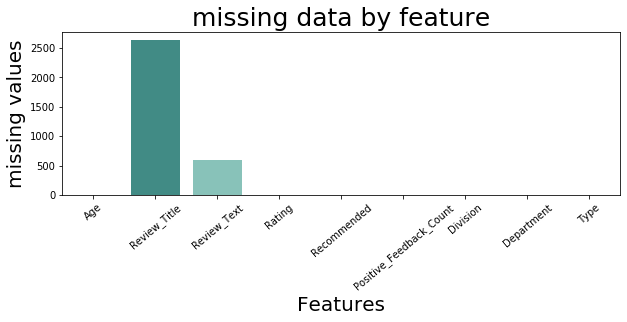

In [15]:
visualizated_md(train)

In [16]:
def imputer(column_name, by = 'mean'):
    if by == 'mean':
        train[column_name].fillna(np.mean(train[column_name]), inplace=True)
        test[column_name].fillna(np.mean(test[column_name]), inplace=True)
    elif by == 'mode':
        train[column_name].fillna(stats.mode(train[column_name], axis = 0)[0][0], inplace=True)
        test[column_name].fillna(stats.mode(test[column_name], axis = 0)[0][0], inplace=True)
    elif by == 0:
        train[column_name].fillna(0, inplace=True)
        test[column_name].fillna(0, inplace=True)
    elif by == 'na':
        train[column_name].fillna('Do not apply', inplace=True)
        test[column_name].fillna('Do not apply', inplace=True)

In [17]:
imputer("Review_Title", by = 0)
imputer("Review_Text", by = 0)

In [18]:
missingness()

,train,test
Age,0,0.000
Department,9,5.000
Division,9,5.000
Positive_Feedback_Count,0,0.000
Rating,0,0.000
Recommended,0,nan
Review_Text,0,0.000
Review_Title,0,0.000
Type,9,5.000


In [19]:
train['Division'].value_counts()

General           9677
General Petite    5680
Initmates         1074
Name: Division, dtype: int64

In [20]:
train['Department'].value_counts()

Tops        7288
Dresses     4475
Bottoms     2620
Intimate    1235
Jackets      732
Trend         81
Name: Department, dtype: int64

In [21]:
train['Type'].value_counts()

Dresses           4475
Knits             3393
Blouses           2129
Sweaters          1003
Pants              943
Jeans              801
Fine gauge         763
Skirts             652
Jackets            496
Lounge             493
Swim               249
Outerwear          236
Shorts             223
Sleep              166
Legwear            116
Intimates          107
Layering           103
Trend               81
Casual bottoms       1
Chemises             1
Name: Type, dtype: int64

In [22]:
imputer("Division", by = 'mode')
imputer("Department", by = 'mode')
imputer("Type", by = 'mode')

In [23]:
missingness()

,train,test
Age,0,0.000
Department,0,0.000
Division,0,0.000
Positive_Feedback_Count,0,0.000
Rating,0,0.000
Recommended,0,nan
Review_Text,0,0.000
Review_Title,0,0.000
Type,0,0.000


In [24]:
train.head()

,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
0,57,Unique,"Just received and sorry to return. i am 5'9"" i wear a size 8 i ordered the m/l . it way really big and to wide",4,1,1,General Petite,Jackets,Jackets
1,60,Simple beauty,This is a tts basic tee with the added flare of the ruffled back peplum and the elegance of the beaded front neckline. the beading is lovely and mine was intact. i bought my normal small based on reviews and the fit was perfect. (34-b) the beige color is a classic neutral and can be worn year ro...,5,1,3,General Petite,Tops,Knits
2,35,Love this top!,I am very happy with this shirt. i don't like skin tight clothes. i bought this top a bit loose but it does not look like i am wearing a sack. it is tunic length on me so i have worn it with jeans and boots. i love the way it flows while i walk. very flattering on. would definitely recommend!,5,1,0,General,Tops,Knits
3,45,0,"Really flattering cut, this shirt is perfect for fall. got so many compliments the first time i wore it!",5,1,0,General Petite,Tops,Blouses
4,56,0,Love the fabric & lace on this top. like other reviews said the arm area is tight where the lace meets the fabric which makes the fit uncomfortable. sadly this top is going back. if you have very skinny upper arms this top will fit fine.,4,1,0,General,Tops,Blouses


In [25]:
test.head()

,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
0,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year...,3,14,General,Dresses,Dresses
1,39,0,This dress is perfection! so pretty and flattering.,5,2,General Petite,Dresses,Dresses
2,44,Runs big,"Bought the black xs to go under the larkspur midi dress because they didn't bother lining the skirt portion (grrrrrrrrrrr).\r\r\nmy stats are 34a-28/29-36 and the xs fit very smoothly around the chest and was flowy around my lower half, so i would say it's running big.\r\r\nthe straps are very p...",5,0,Initmates,Intimate,Intimates
3,47,Stylish and comfortable,"I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.",5,0,General,Dresses,Dresses
4,55,Versatile,"I love this shirt because when i first saw it, i wasn't sure if it was a shirt or dress. since it is see-through if you wear it like a dress you will need a slip or wear it with leggings. i bought a slip, wore the tie in the back, and rocked it with white wedges. you could also wear it as a vest...",5,0,General,Tops,Blouses


In [26]:
train_corr = train[['Recommended','Rating','Age','Positive_Feedback_Count']]
corr = train_corr.corr()["Recommended"].sort_values(ascending=False)
corr

Recommended                1.000
Rating                     0.795
Age                        0.035
Positive_Feedback_Count   -0.069
Name: Recommended, dtype: float64

In [27]:
y_axis = train['Recommended']
x_tr = train.iloc[:,:]
x_te = test.iloc[:,:]
categorical = x_tr.select_dtypes(include="object")
categorical 

,Review_Title,Review_Text,Division,Department,Type
0,Unique,"Just received and sorry to return. i am 5'9"" i wear a size 8 i ordered the m/l . it way really big and to wide",General Petite,Jackets,Jackets
1,Simple beauty,This is a tts basic tee with the added flare of the ruffled back peplum and the elegance of the beaded front neckline. the beading is lovely and mine was intact. i bought my normal small based on reviews and the fit was perfect. (34-b) the beige color is a classic neutral and can be worn year ro...,General Petite,Tops,Knits
2,Love this top!,I am very happy with this shirt. i don't like skin tight clothes. i bought this top a bit loose but it does not look like i am wearing a sack. it is tunic length on me so i have worn it with jeans and boots. i love the way it flows while i walk. very flattering on. would definitely recommend!,General,Tops,Knits
3,0,"Really flattering cut, this shirt is perfect for fall. got so many compliments the first time i wore it!",General Petite,Tops,Blouses
4,0,Love the fabric & lace on this top. like other reviews said the arm area is tight where the lace meets the fabric which makes the fit uncomfortable. sadly this top is going back. if you have very skinny upper arms this top will fit fine.,General,Tops,Blouses
...,...,...,...,...,...
16435,0,"Agree with the other reviewers. this top is excellent. great length, weight & bounce to it, flattering without being clingy. i'm 5'10"" with a long torso, so i'm always in the market for tops with longer hemlines and decent material without being too tight or clingy. this one i love! i bought it ...",General,Tops,Knits
16436,Completes so many outfits!,I like this sweater so much i just bought it in a second color! the pleats make the sweater conform to my shape just enough to be flattering. i wore it over three different dresses this week that might have felt too bare for work or cooler weather. i live in a hot climate so this is the right we...,General,Tops,Fine gauge
16437,Great boho chic dress,"I bought this dress for the summer, but it will transition nicely into the fall with a sweater, leggings, and boots. the color and pattern are pretty and without being washed out. the macrame belt is absolutely beautiful. it doesn't show up well in the picture, but is intricate and artistic. see...",General,Dresses,Dresses
16438,Cute classic,Cute twist with the open back on a simple classic sweater... light weight...,General,Tops,Sweaters


Text(0, 0.5, 'Counts')

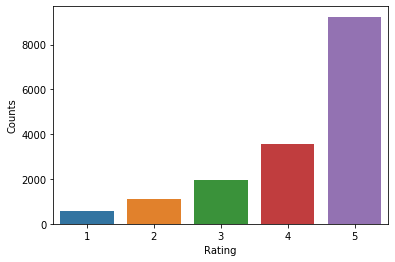

In [28]:
size, scale = 5, 5
c = sns.countplot(x='Rating', data=train_corr)

plt.xlabel('Rating')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

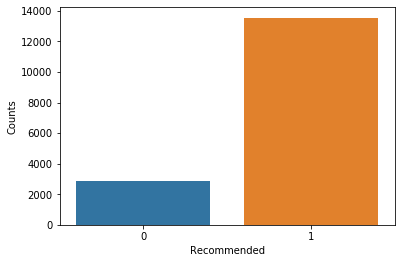

In [29]:
size, scale = 5, 5
c = sns.countplot(x='Recommended', data=train_corr)

plt.xlabel('Recommended')
plt.ylabel('Counts')

In [30]:
train['Department'].value_counts()

Tops        7297
Dresses     4475
Bottoms     2620
Intimate    1235
Jackets      732
Trend         81
Name: Department, dtype: int64

In [31]:
train['Type'].value_counts()

Dresses           4484
Knits             3393
Blouses           2129
Sweaters          1003
Pants              943
Jeans              801
Fine gauge         763
Skirts             652
Jackets            496
Lounge             493
Swim               249
Outerwear          236
Shorts             223
Sleep              166
Legwear            116
Intimates          107
Layering           103
Trend               81
Casual bottoms       1
Chemises             1
Name: Type, dtype: int64

In [32]:
train['Division'].value_counts()

General           9686
General Petite    5680
Initmates         1074
Name: Division, dtype: int64

In [33]:
from matplotlib import font_manager as fm
from matplotlib import cm



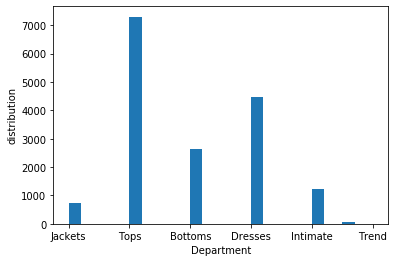

In [34]:

plt.hist(train['Department'], width=0.2)
plt.xticks(rotation=0)

plt.xlabel('Department')
plt.ylabel('distribution')
plt.show()

In [35]:
def corsstable(variable):
    table = pd.crosstab(train['Recommended'],train[variable],normalize = 'columns')
    print(table)
    fig, ax = plt.subplots(figsize=(15,4))
    plt.style.use('ggplot')
    (table.T).plot(kind='bar', alpha=0.9, ax=ax)
    ax.set_ylabel('Count')
    ax.legend_.set_title('Recommended')
    plt.tight_layout()
    sns.despine()
    plt.show()

Department   Bottoms  Dresses  Intimate  Jackets  Tops  Trend
Recommended                                                  
0              0.145    0.193     0.153    0.156 0.182  0.235
1              0.855    0.807     0.847    0.844 0.818  0.765


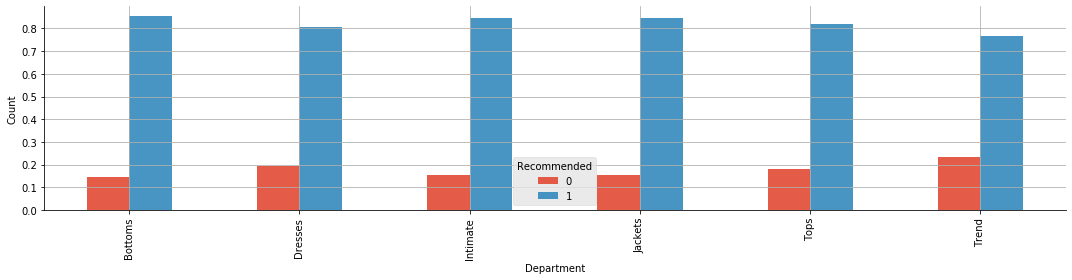

In [36]:
corsstable('Department')

Type         Blouses  Casual bottoms  Chemises  Dresses  Fine gauge  \
Recommended                                                           
0              0.192           0.000     0.000    0.193       0.160   
1              0.808           1.000     1.000    0.807       0.840   

Type         Intimates  Jackets  Jeans  Knits  Layering  Legwear  Lounge  \
Recommended                                                                
0                0.140    0.143  0.112  0.177     0.107    0.155   0.146   
1                0.860    0.857  0.888  0.823     0.893    0.845   0.854   

Type         Outerwear  Pants  Shorts  Skirts  Sleep  Sweaters  Swim  Trend  
Recommended                                                                  
0                0.182  0.173   0.161   0.141  0.145     0.194 0.197  0.235  
1                0.818  0.827   0.839   0.859  0.855     0.806 0.803  0.765  


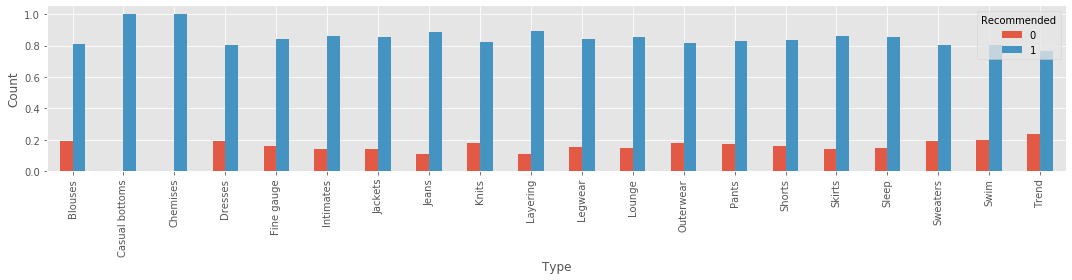

In [37]:
corsstable('Type')

In [38]:
def corsstable_2(variable):
    table = pd.crosstab(train['Rating'],train[variable],normalize = 'columns')
    print(table)
    fig, ax = plt.subplots(figsize=(15,4))
    plt.style.use('ggplot')
    (table.T).plot(kind='bar', alpha=0.9, ax=ax)
    ax.set_ylabel('Count')
    ax.legend_.set_title('Rating')
    plt.tight_layout()
    sns.despine()
    plt.show()

Department  Bottoms  Dresses  Intimate  Jackets  Tops  Trend
Rating                                                      
1             0.027    0.038     0.035    0.051 0.035  0.062
2             0.054    0.072     0.057    0.055 0.070  0.086
3             0.112    0.129     0.102    0.075 0.124  0.173
4             0.213    0.221     0.214    0.201 0.216  0.259
5             0.595    0.540     0.593    0.619 0.555  0.420


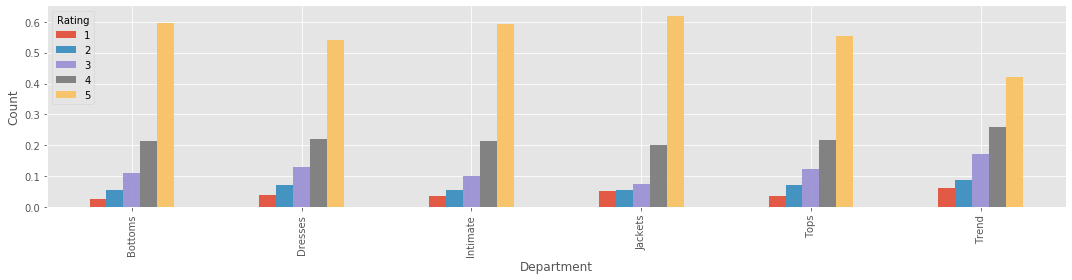

In [39]:
corsstable_2('Department')

Type    Blouses  Casual bottoms  Chemises  Dresses  Fine gauge  Intimates  \
Rating                                                                      
1         0.042           0.000     0.000    0.037       0.020      0.037   
2         0.072           0.000     0.000    0.072       0.077      0.065   
3         0.124           0.000     0.000    0.129       0.105      0.103   
4         0.217           0.000     1.000    0.220       0.210      0.196   
5         0.545           1.000     0.000    0.541       0.588      0.598   

Type    Jackets  Jeans  Knits  Layering  Legwear  Lounge  Outerwear  Pants  \
Rating                                                                       
1         0.050  0.021  0.036     0.010    0.052   0.034      0.051  0.028   
2         0.048  0.047  0.067     0.068    0.043   0.034      0.068  0.064   
3         0.073  0.095  0.123     0.049    0.121   0.118      0.081  0.119   
4         0.169  0.202  0.225     0.233    0.207   0.219      0.267  0

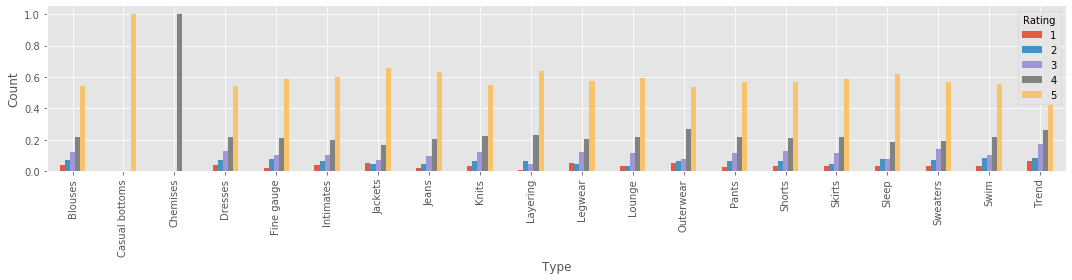

In [40]:
corsstable_2('Type')

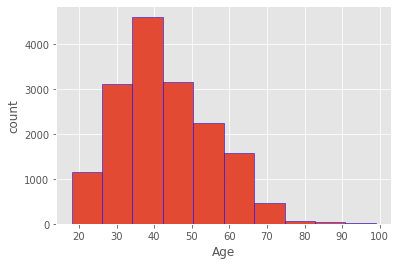

In [41]:
plt.hist(train['Age'],edgecolor='Blue')
plt.ylabel('count')
plt.xlabel('Age')
plt.show()

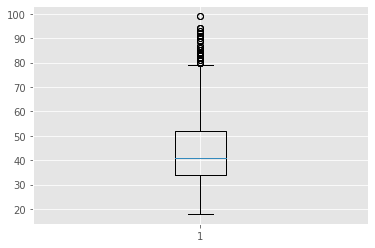

In [42]:
plt.boxplot(train["Age"])
plt.show()

In [43]:
bins = [0,18,40,70,150]
train['Age_degree'] = pd.cut(train['Age'], bins,labels=['young', 'youth', 'middle-aged', 'old'])
test['Age_degree'] = pd.cut(test['Age'], bins,labels=['young', 'youth', 'middle-aged', 'old'])
print(pd.value_counts(train['Age_degree']))

middle-aged    8305
youth          7878
old             253
young             4
Name: Age_degree, dtype: int64


Age_degree  young  youth  middle-aged   old
Rating                                     
1           0.000  0.035        0.036 0.036
2           0.000  0.068        0.065 0.059
3           0.000  0.129        0.112 0.095
4           0.500  0.221        0.213 0.158
5           0.500  0.547        0.574 0.652


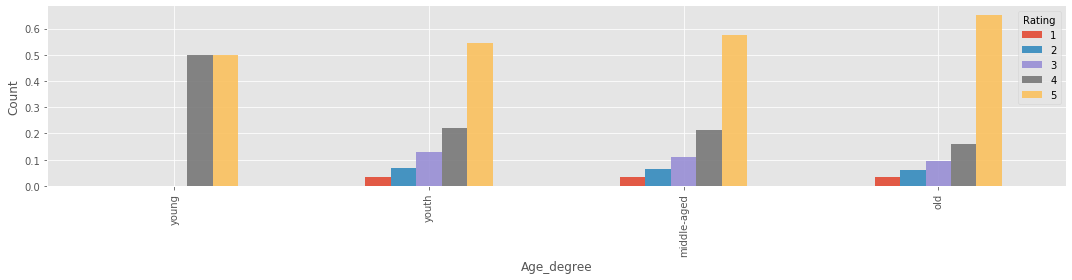

In [44]:
corsstable_2('Age_degree')

In [65]:
train_df=pd.read_csv('product_train.csv')
test_df=pd.read_csv('Product_test.csv')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
traintest= train_test_split(train_df,test_size=0.2,random_state=5)

In [86]:
train_corpus= train['Review_Text'].tolist()
test_corpus= test['Review_Text'].tolist()

In [97]:
y_train= train['Recommended']
y_test= test['Recommended']

KeyError: 'Recommended'

In [88]:
from sklearn.feature_extraction.text import CountVectorizer


In [85]:
bow= CountVectorizer(max_features=500)

In [100]:
x_train= count.fit_transform(train_corpus)
x_test = count.transform(test_corpus)

NameError: name 'count' is not defined

In [91]:
from sklearn.linear_model import LogisticRegression


In [92]:
lr_model= LogisticRegression(solver='liblinear')

In [93]:
lr_model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [94]:
y_predict= lr_model.predict(x_test)

NameError: name 'x_test' is not defined

In [101]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, f1_score

In [103]:
y_pred= lr_model.predict(x_test)

NameError: name 'x_test' is not defined

In [104]:
precision_score(y_test,y_predict)

NameError: name 'y_predict' is not defined

In [105]:
recall_score(y_test,y_predict)

NameError: name 'y_predict' is not defined

In [106]:
f1_score(y_test,y_predict)

NameError: name 'y_predict' is not defined

In [108]:
classification_report(y_test,y_predict)

NameError: name 'classification_report' is not defined